# Project - Boston Housing Data


1. install Libraries

In [34]:
#install specific version of libraries used in lab
'''! pip install pandas
! pip install numpy
! pip install scipy
! pip install seaborn
! pip install matplotlib
! pip install statsmodels
'''

'! pip install pandas\n! pip install numpy\n! pip install scipy\n! pip install seaborn\n! pip install matplotlib\n! pip install statsmodels\n'

2. Import the libraries 

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy 

Read dataset

In [36]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [38]:
#boston_df.info()

## Task 4: Generate Descriptive Statistics and Visualizations
#### 1. For the "Median value of owner-occupied homes" provide a boxplotvariable

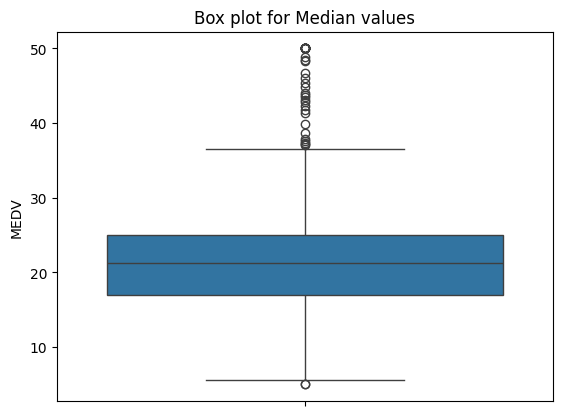

In [62]:
ax=sns.boxplot(y='MEDV',data=boston_df)
plt.title("Box plot for Median values")
plt.show()

#### 2. Provide a  bar plot for the Charles river variable

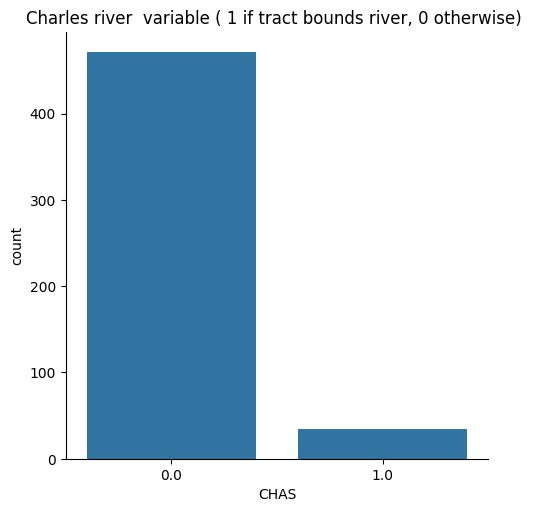

In [72]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title("Charles river  variable ( 1 if tract bounds river, 0 otherwise) ")
plt.show()

#### 3. Provide a boxplot for the MEDV variable vs the AGE variable. 
Discretize the age variable into three groups of
1. 35 years and younger
2. between 35 and 70 years and
3. 70 years and older

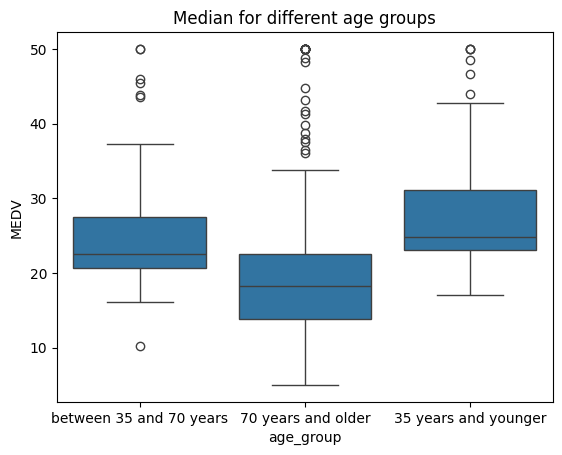

In [48]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
plt.title("Median for different age groups")
plt.show()

#### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.    What can you say about the relationship?

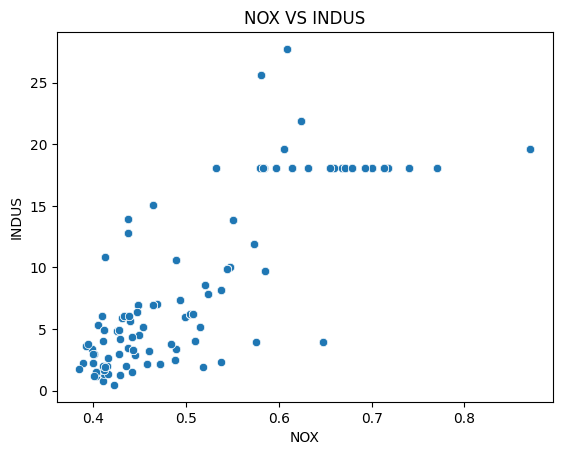

In [42]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title("NOX VS INDUS")
plt.show()

#### 5. Create a histogram for the pupil to teacher ratio variable

C:\Users\Pabitha\AppData\Local\Temp\ipykernel_21996\1357524912.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['PTRATIO'], kde = False)


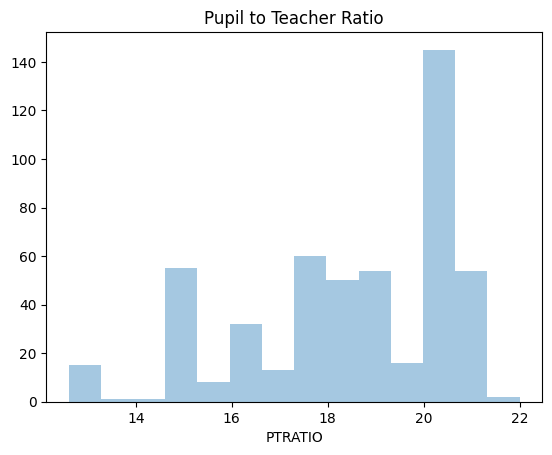

In [69]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False)
plt.title("Pupil to Teacher Ratio")
plt.show()

## Task 5: Use the appropriate tests to answer the questions provided.

#### 1.Is there a significant difference in median value of houses bounded by the Charles river or not? 
##### T-test for independent samples

For the independent t-test, the following assumptions must be met.

*   One independent, categorical variable with two levels or group
*   One dependent continuous variable
*   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
*   The dependent variable must follow a normal distribution
*   Assumption of homogeneity of variance


*Hypothesis*

*   $H\_0: µ\_1 = µ\_2$ ("There is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("There is a difference in median value of houses bounded by the Charles river")


We can plot the dependent variable with a historgram

C:\Users\Pabitha\AppData\Local\Temp\ipykernel_21996\3474468048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

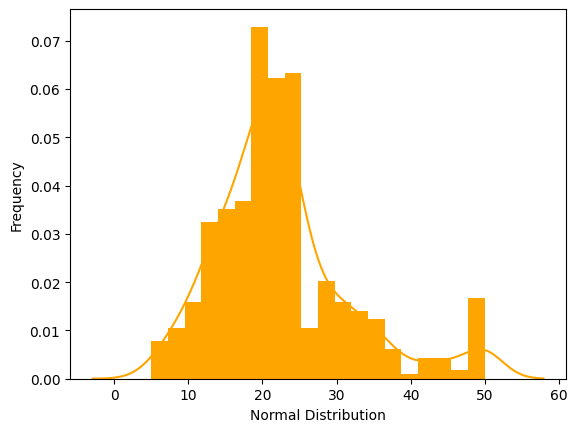

In [102]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='orange',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

Since indepenedant variable has to categorical, we create new column for houses bounded by the Charles river.

In [82]:
boston_df.loc[(boston_df['CHAS'] == 1), 'river_group'] = 'Yes'
boston_df.loc[(boston_df['CHAS'] == 0), 'river_group'] = 'No'

We can use the Levene's Test in Python to check test significance

In [103]:
scipy.stats.levene(boston_df[boston_df['river_group'] == 'Yes']['MEDV'],
                   boston_df[boston_df['river_group'] == 'No']['MEDV'], center='mean')

# since the p-value is less than 0.05, variances are not equal

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [104]:
scipy.stats.ttest_ind(boston_df[boston_df['river_group'] == 'Yes']['MEDV'],
                   boston_df[boston_df['river_group'] == 'No']['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river.

#### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 
##### ANOVA Test

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable, we have already created a new column age_group as below:

*   35 years and younger
*   between 35 and 70 years
*   70 years and older


*hypothesis:*

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


Test for equality of variance

In [90]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is greater than 0.05, we can assume equality of variance

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

First, separate the three samples (one for each job category) into a variable each.

In [87]:
thirty5_lower=boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirty5_seventy=boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'] 
seventy_older=boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

Now, run a one-way ANOVA.

In [88]:
f_statistic, p_value = scipy.stats.f_oneway(thirty5_lower, thirty5_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

#### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
##### Pearson Correlation

*hypothesis:*

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


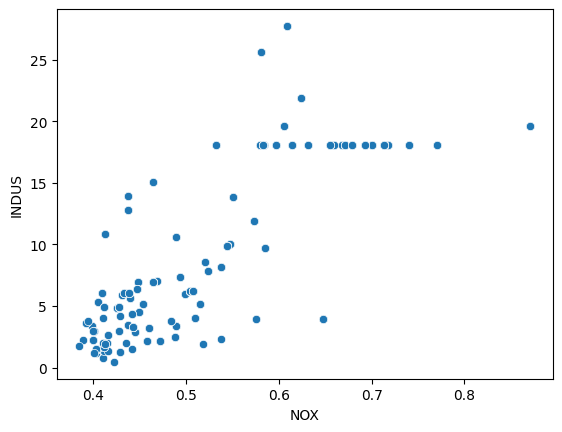

In [92]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [93]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

**Conclusion:** Since the p-value < 0.05, we reject the Null hypothesis and conclude that there  exists a relationship between  Nitric oxide concentrations and proportion of non-retail business acres per town


#### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?
##### Regression with T-test

*Hypothesis :*

*   $H\_0: β1$ = 0 ('Additional weighted distance to the five Boston employment centres' has no effect on the 'Median value of owner occupied homes')
*   $H\_1: β1$ is not equal to 0 ('Additional weighted distance to the five Boston employment centres' has effect on the 'Median value of owner occupied homes')

In [76]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        15:48:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference  in the 'Median value of owner occupied homes based on Additional weighted distance to the five Boston employment centres. 

**End of project**